<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/AI_gen_AutoPipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#gpu

In [2]:
!pip install diffusers transformers safetensors accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 109.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 105.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.1 MB/s eta 0:00:00


In [3]:
from diffusers import AutoPipelineForText2Image, AutoPipelineForImage2Image, AutoPipelineForInpainting
from diffusers.utils import load_image
import matplotlib.pyplot as plt
import torch
import requests
from PIL import Image
from io import BytesIO

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

## Text to image

In [4]:
pretrained_model_or_path = "runwayml/stable-diffusion-v1-5"
prompt = "a car in a street in a big city"
num_inference_steps = 25

In [5]:
pipeline = AutoPipelineForText2Image.from_pretrained(
    pretrained_model_or_path = pretrained_model_or_path, data_type=torch.float16, use_safetensors=True).to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Keyword arguments {'data_type': torch.float16} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [6]:
imagem = pipeline(prompt=prompt,num_inference_steps=num_inference_steps,).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

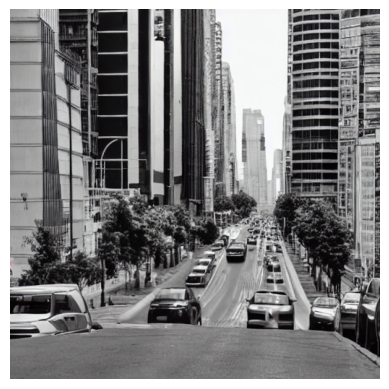

In [7]:
plt.imshow(imagem)
plt.axis('off')
plt.show()

## Image to Image

In [8]:
pretrained_model_or_path = "runwayml/stable-diffusion-v1-5"
prompt = "The woman when she was a child."
num_inference_steps = 80
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/800px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg"

In [9]:
pipeline = AutoPipelineForImage2Image.from_pretrained(
    pretrained_model_or_path = pretrained_model_or_path, data_type=torch.float16, use_safetensors=True,
    safety_checker = None).to("cuda")
response = requests.get(url)
imagem = Image.open(BytesIO(response.content)).convert("RGB")

Keyword arguments {'data_type': torch.float16} are not expected by StableDiffusionImg2ImgPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [10]:
imagem = pipeline(prompt, imagem, num_inference_steps=num_inference_steps).images[0]

  0%|          | 0/64 [00:00<?, ?it/s]

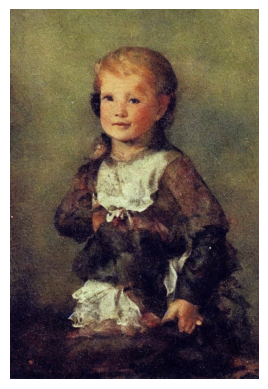

In [11]:
plt.imshow(imagem)
plt.axis('off')
plt.show()

## InPainting

In [12]:
pretrained_model_or_path = "stabilityai/stable-diffusion-xl-base-1.0"
prompt = "Mickey Mouse sitting on a bench"
num_inference_steps = 75
imagem = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mascara = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

In [13]:
init_image = load_image(imagem).convert("RGB")
mask_image = load_image(mascara).convert("RGB")
pipeline = AutoPipelineForInpainting.from_pretrained(
    pretrained_model_or_path = pretrained_model_or_path, torch_dtype=torch.float16, use_safetensors=True).to("cuda")

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [14]:
imagem_gen = pipeline(prompt = prompt , image=init_image, mask_image=mask_image, num_inference_steps=num_inference_steps).images[0]

  0%|          | 0/74 [00:00<?, ?it/s]

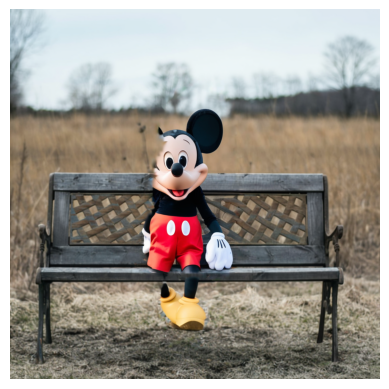

In [15]:
plt.imshow(imagem_gen)
plt.axis('off')
plt.show()